In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image as pil_image
import os
import matplotlib.pyplot as plt
from copy import deepcopy

In [ ]:
!pip install -U tensorflow==2.0.0

In [ ]:
print(tf.__version__)

In [ ]:
pip install 'h5py<3.0.0'

# Original image

In [ ]:
train_img = []
IMG_HEIGHT =512
IMG_WIDTH =512
for img_folder in os.listdir('train_img/'):
    for img_jpg in os.listdir('train_img/'+img_folder):
        img = pil_image.open('train_img/'+img_folder+'/'+img_jpg)
        img = img.resize((IMG_HEIGHT,IMG_WIDTH))
        img = np.array(img)
        #img = img.astype('float32')
        train_img.append(img)


In [ ]:
train_img[4].shape

In [ ]:
!pwd
!ls /kaggle/input/hotel-id-to-combat-human-trafficking-2022-fgvc9


In [15]:
img = pil_image.open('/kaggle/input/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_images/81304/000031772.jpg')
img=img.resize((512,512))
img = np.array(img)
img=img/255
img.shape

(512, 512, 3)

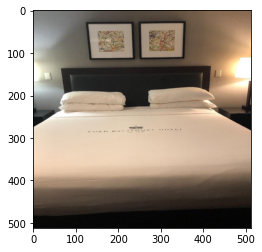

In [16]:
plt.imshow(img)

In [ ]:
resizeimg =pil_image.fromarray((img*255).astype(np.uint8))
resizeimg

# Mask image

In [ ]:
train_masks = []
IMG_HEIGHT =256
IMG_WIDTH =256
#count = 0
for mask in os.listdir('train_masks'):
    img = np.array(pil_image.open('train_masks/'+mask))
    #img = np.resize(img,(IMG_HEIGHT,IMG_WIDTH,3))
    #img = img.astype('float32')
    train_masks.append(img)



In [17]:
img_m = pil_image.open('/kaggle/input/hotel-id-to-combat-human-trafficking-2022-fgvc9/train_masks/00006.png')
new_image = pil_image.new("RGBA", img_m.size, "WHITE") # Create a white rgba background
new_image.paste(img_m, (0, 0), img_m)    
img_m = new_image.convert('RGB')
img_m = img_m.resize((512,512))
imgm = np.array(img_m)
mask_img = imgm/255
mask_img.shape


(512, 512, 3)

In [18]:
mask_img[:,:,1] = np.where(mask_img[:,:,1]>0,1,0)
mask_img[:,:,2] = np.where(mask_img[:,:,2]>0,1,0)

In [19]:
#red mask to black mask
mask_img[np.logical_and((mask_img[:,:,0]==1),(mask_img[:,:,1]==0),(mask_img[:,:,2]==0))]=(0,0,0)

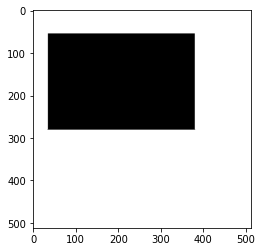

In [20]:
plt.imshow(mask_img)

In [ ]:
np.unique(mask_img,return_counts=True)

# combine: img+ mask = MASKED_image

In [21]:
#masked_img = deepcopy(img)
masked_img = img.copy()
masked_img[mask_img==0] = 1
#masked_img[np.logical_and((mask_img[:,:,0]==0),(mask_img[:,:,1]==0),(mask_img[:,:,2]==0))] = (0,0,0)

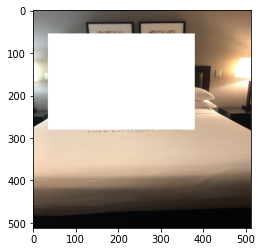

In [22]:
plt.imshow(masked_img)

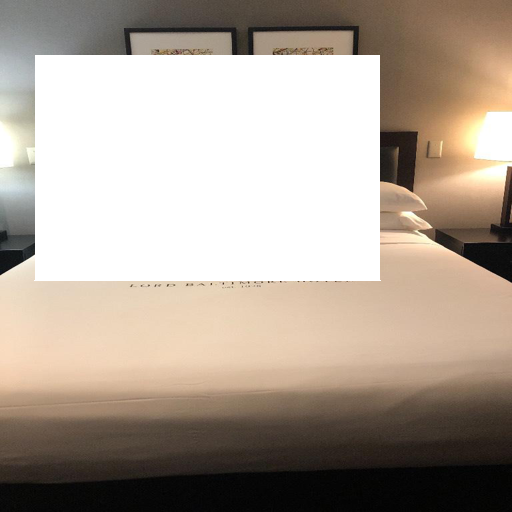

In [23]:
pil_image.fromarray((masked_img*255).astype(np.uint8))

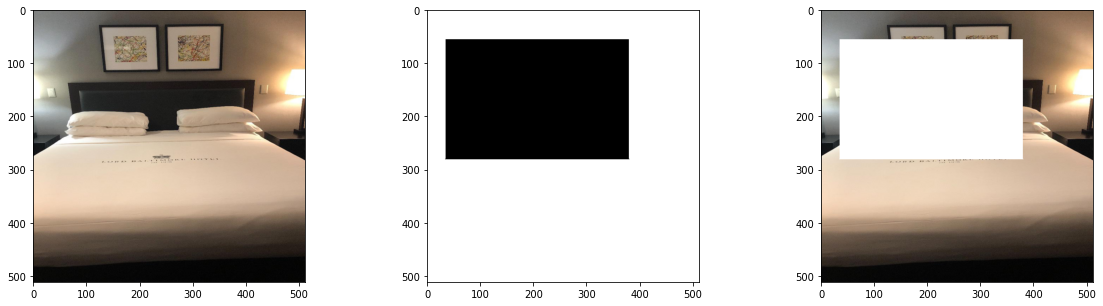

In [24]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(img)
axes[1].imshow(mask_img)
axes[2].imshow(masked_img)
plt.show()

# Test Image

In [ ]:
im = pil_image.open('test_img/abc.jpg')
imz= im.resize((512,512))
imz


In [ ]:
arim = np.array(imz)
print(arim.shape)
#arim = arim/255
#arim = np.where(arim==0,0,arim)
#print(np.unique(arim, return_counts=True))
#ier= pil_image.fromarray(arim)
#ier
plt.imshow(arim[:,:,:])

In [ ]:
imz.getpixel((223,40))

In [ ]:
#print(np.unique(arim[:,:,1], return_counts=True))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, LambdaCallback
from keras.layers import Input, Dense, ZeroPadding2D
from keras.models import Model
#from kaggle.input.libsss.pconv_layer import PConv2D

In [ ]:
!pwd

In [ ]:
#pwd
!mkdir libs
#!ls ../input/hotel-id-to-combat-human-trafficking-2022-fgvc9

In [ ]:
from shutil import copyfile
#import module
copyfile(src = "../input/libsnew/pconv_layer.py", dst = "../working/libs/pconv_layer.py")
copyfile(src = "../input/libsnew/gconv_layer.py", dst = "../working/libs/gconv_layer.py")
copyfile(src = "../input/libsnew/losses.py", dst = "../working/libs/losses.py")
copyfile(src = "../input/libsnew/unet_model.py", dst = "../working/libs/unet_model.py")
copyfile(src = "../input/libsnew/util.py", dst = "../working/libs/util.py")
copyfile(src = "../input/weights/pconv_imagenet.h5", dst = "../working/pconv_imagenet.h5")

In [ ]:
from libs.pconv_layer import PConv2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, LambdaCallback
#from libs.util import MaskGenerator
#from libs.data_loaders import DataGenerator
from libs.unet_model import InpaintingUnet

# #model

In [ ]:

shape=(512,512,3)
# Input images and masks
input_img = Input(shape=(shape[0], shape[1], shape[2],))
input_mask = Input(shape=(shape[0], shape[1], shape[2],))
output_img, output_mask1 = PConv2D(8, kernel_size=(7,7), strides=(2,2))([input_img, input_mask])
output_img, output_mask2 = PConv2D(16, kernel_size=(5,5), strides=(2,2))([output_img, output_mask1])
output_img, output_mask3 = PConv2D(32, kernel_size=(5,5), strides=(2,2))([output_img, output_mask2])
output_img, output_mask4 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask3])
output_img, output_mask5 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask4])
output_img, output_mask6 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask5])
output_img, output_mask7 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask6])
output_img, output_mask8 = PConv2D(64, kernel_size=(3,3), strides=(2,2))([output_img, output_mask7])

# Create model
modelmsk = Model(
    inputs=[input_img, input_mask], 
    outputs=[
        output_img, output_mask1, output_mask2, 
        output_mask3, output_mask4, output_mask5,
        output_mask6, output_mask7, output_mask8
    ])
modelmsk.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Show summary of the model
modelmsk.summary()

In [ ]:
masked_imgq=masked_img.reshape(1,masked_img.shape[0],masked_img.shape[1],masked_img.shape[2])
mask_imgq=mask_img.reshape(1,mask_img.shape[0],mask_img.shape[1],mask_img.shape[2])
imgq = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
mask_imgq.shape
imgq.shape



In [ ]:
plt.imshow(masked_imgq[0])

In [ ]:
mask_imgq.shape

In [ ]:
output_img, o1, o2, o3, o4, o5, o6, o7, o8 = modelmsk.predict([masked_imgq, mask_imgq])

In [ ]:
_, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[0][0].imshow(o1[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][1].imshow(o2[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][2].imshow(o3[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][3].imshow(o4[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][0].imshow(o5[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][1].imshow(o6[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][2].imshow(o7[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[1][3].imshow(o8[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
#axes[2][0].imshow(output_img[0, :,:, 0], cmap = 'gray', vmin=0, vmax=1)
axes[0][0].set_title(f"Shape: {o1.shape}")
axes[0][1].set_title(f"Shape: {o2.shape}")
axes[0][2].set_title(f"Shape: {o3.shape}")
axes[0][3].set_title(f"Shape: {o4.shape}")
axes[1][0].set_title(f"Shape: {o5.shape}")
axes[1][1].set_title(f"Shape: {o6.shape}")
axes[1][2].set_title(f"Shape: {o7.shape}")
axes[1][3].set_title(f"Shape: {o8.shape}")
plt.show()

In [ ]:
output_img.shape

In [ ]:
from libs.pconv_model import PConvUnet

In [ ]:
PConvUnet().summary()

In [ ]:
model = PConvUnet()

In [ ]:
generator =([masked_imgq,maskq],imgq)

## unet model try

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Dropout, LeakyReLU, BatchNormalization, Activation, Lambda
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import backend as K
from libs.pconv_layer import PConv2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, LambdaCallback

In [2]:
def build_pconv_unet(train_bn=True):      

        # INPUTS
        inputs_img = Input((512, 512, 3), name='inputs_img')
        inputs_mask = Input((512, 512, 3), name='inputs_mask')
        
        # ENCODER
        def encoder_layer(img_in, mask_in, filters, kernel_size, bn=True):
            conv, mask = PConv2D(filters, kernel_size, strides=2, padding='same')([img_in, mask_in])
            if bn:
                conv = BatchNormalization(name='EncBN'+str(encoder_layer.counter))(conv, training=train_bn)
            conv = Activation('relu')(conv)
            encoder_layer.counter += 1
            return conv, mask
        encoder_layer.counter = 0
        
        e_conv1, e_mask1 = encoder_layer(inputs_img, inputs_mask, 64, 7, bn=False)
        e_conv2, e_mask2 = encoder_layer(e_conv1, e_mask1, 128, 5)
        e_conv3, e_mask3 = encoder_layer(e_conv2, e_mask2, 256, 5)
        e_conv4, e_mask4 = encoder_layer(e_conv3, e_mask3, 512, 3)
        e_conv5, e_mask5 = encoder_layer(e_conv4, e_mask4, 512, 3)
        e_conv6, e_mask6 = encoder_layer(e_conv5, e_mask5, 512, 3)
        e_conv7, e_mask7 = encoder_layer(e_conv6, e_mask6, 512, 3)
        e_conv8, e_mask8 = encoder_layer(e_conv7, e_mask7, 512, 3)
        
        # DECODER
        def decoder_layer(img_in, mask_in, e_conv, e_mask, filters, kernel_size, bn=True):
            up_img = UpSampling2D(size=(2,2))(img_in)
            up_mask = UpSampling2D(size=(2,2))(mask_in)
            concat_img = Concatenate(axis=3)([e_conv,up_img])
            concat_mask = Concatenate(axis=3)([e_mask,up_mask])
            conv, mask = PConv2D(filters, kernel_size, padding='same')([concat_img, concat_mask])
            if bn:
                conv = BatchNormalization()(conv)
            conv = LeakyReLU(alpha=0.2)(conv)
            return conv, mask
            
        d_conv9, d_mask9 = decoder_layer(e_conv8, e_mask8, e_conv7, e_mask7, 512, 3)
        d_conv10, d_mask10 = decoder_layer(d_conv9, d_mask9, e_conv6, e_mask6, 512, 3)
        d_conv11, d_mask11 = decoder_layer(d_conv10, d_mask10, e_conv5, e_mask5, 512, 3)
        d_conv12, d_mask12 = decoder_layer(d_conv11, d_mask11, e_conv4, e_mask4, 512, 3)
        d_conv13, d_mask13 = decoder_layer(d_conv12, d_mask12, e_conv3, e_mask3, 256, 3)
        d_conv14, d_mask14 = decoder_layer(d_conv13, d_mask13, e_conv2, e_mask2, 128, 3)
        d_conv15, d_mask15 = decoder_layer(d_conv14, d_mask14, e_conv1, e_mask1, 64, 3)
        d_conv16, d_mask16 = decoder_layer(d_conv15, d_mask15, inputs_img, inputs_mask, 3, 3, bn=False)
        outputs = Conv2D(3, 1, activation = 'sigmoid', name='outputs_img')(d_conv16)
        
        # Setup the model inputs / outputs
        model = Model(inputs=[inputs_img, inputs_mask], outputs=outputs)

        return model, inputs_mask 

In [3]:
 model, inputs_mask = build_pconv_unet()

2022-05-23 21:21:40.293506: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-05-23 21:21:40.297887: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000140000 Hz
2022-05-23 21:21:40.298104: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b236f62bd0 executing computations on platform Host. Devices:
2022-05-23 21:21:40.298130: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [4]:
model.load_weights('pconv_imagenet.h5',by_name=False)

In [5]:
def PSNR(y_true, y_pred):
        """
        PSNR is Peek Signal to Noise Ratio, see https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio
        The equation is:
        PSNR = 20 * log10(MAX_I) - 10 * log10(MSE)
        
        Our input is scaled with be within the range -2.11 to 2.64 (imagenet value scaling). We use the difference between these
        two values (4.75) as MAX_I        
        """        
        #return 20 * K.log(4.75) / K.log(10.0) - 10.0 * K.log(K.mean(K.square(y_pred - y_true))) / K.log(10.0) 
        return - 10.0 * K.log(K.mean(K.square(y_pred - y_true))) / K.log(10.0) 

In [6]:
    def loss_total(mask):
        """
        Creates a loss function which sums all the loss components 
        and multiplies by their weights. See paper eq. 7.
        """
        def loss(y_true, y_pred):

            # Compute predicted image with non-hole pixels set to ground truth
            y_comp = mask * y_true + (1-mask) * y_pred

            # Compute the vgg features. 
#             if self.vgg_device:
#                 with tf.device(self.vgg_device):
#                     vgg_out = self.vgg(y_pred)
#                     vgg_gt = self.vgg(y_true)
#                     vgg_comp = self.vgg(y_comp)
#             else:
#                 vgg_out = self.vgg(y_pred)
#                 vgg_gt = self.vgg(y_true)
#                 vgg_comp = self.vgg(y_comp)
            
            # Compute loss components
            l1 = loss_valid(mask, y_true, y_pred)
            l2 = loss_hole(mask, y_true, y_pred)
            #l3 = self.loss_perceptual(vgg_out, vgg_gt, vgg_comp)
           # l4 = self.loss_style(vgg_out, vgg_gt)
            #l5 = self.loss_style(vgg_comp, vgg_gt)
            #l6 = loss_tv(mask, y_comp)

            # Return loss function
            return l1 + 6*l2 

        return loss 

In [7]:
def loss_hole(mask, y_true, y_pred):
        """Pixel L1 loss within the hole / mask"""
        return l1((1-mask) * y_true, (1-mask) * y_pred)
    
def loss_valid(mask, y_true, y_pred):
    """Pixel L1 loss outside the hole / mask"""
    return l1(mask * y_true, mask * y_pred)

def loss_tv( mask, y_comp):
        """Total variation loss, used for smoothing the hole region, see. eq. 6"""

        # Create dilated hole region using a 3x3 kernel of all 1s.
        kernel = K.ones(shape=(3, 3, mask.shape[3], mask.shape[3]))
        dilated_mask = K.conv2d(1-mask, kernel, data_format='channels_last', padding='same')

        # Cast values to be [0., 1.], and compute dilated hole region of y_comp
        dilated_mask = K.cast(K.greater(dilated_mask, 0), 'float32')
        P = dilated_mask * y_comp

        # Calculate total variation loss
        a = l1(P[:,1:,:,:], P[:,:-1,:,:])
        b = l1(P[:,:,1:,:], P[:,:,:-1,:])        
        return a+b
    
    

In [8]:
def l1(y_true, y_pred):
        """Calculate the L1 loss used in all loss calculations"""
        if K.ndim(y_true) == 4:
            return K.mean(K.abs(y_pred - y_true), axis=[1,2,3])
        elif K.ndim(y_true) == 3:
            return K.mean(K.abs(y_pred - y_true), axis=[1,2])
        else:
            raise NotImplementedError("Calculating L1 loss on 1D tensors? should not occur for this network")
    

In [10]:
def compile_pconv_unet(model, inputs_mask, lr=0.0002):
        model.compile(
            optimizer = Adam(learning_rate=lr),
            loss=loss_total(inputs_mask),
            metrics=[PSNR],
            experimental_run_tf_function=False
        )

In [11]:
compile_pconv_unet(model, inputs_mask)

In [ ]:
#model.summary()

In [12]:
def plot_sample_data(masked, mask, ori, middle_title='Raw Mask'):
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    axes[0].imshow(masked[:,:,:])
    axes[0].set_title('Masked Input')
    axes[1].imshow(mask[:,:,:])
    axes[1].set_title(middle_title)
    axes[2].imshow(ori[:,:,:])
    axes[2].set_title('Target Output')
    plt.show()

In [1]:
img_list= np.array([img]).repeat(10,axis=0).reshape(-1,512,512,3)
mask_list= np.array([mask_img]).repeat(10,axis=0).reshape(-1,512,512,3)
masked_list= np.array([masked_img]).repeat(10,axis=0).reshape(-1,512,512,3)

NameError: name 'np' is not defined

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
!ls /kaggle/working

In [ ]:
model.fit(x= [img_list,mask_list],y =img_list, batch_size=len(img_list), epochs=5,callbacks=[ ModelCheckpoint(
            'weightsnew.h5',
            monitor='PSNR', mode='max', 
            save_best_only=True, 
            save_weights_only=True
        ),
        LambdaCallback(
            on_epoch_end=lambda epoch, logs: plot_sample_data(
                masked_img, 
                model.predict(
                    [
                        np.expand_dims(img,0), 
                        np.expand_dims(mask_img,0)
                    ]
                )[0]
                , 
                img,
                middle_title='Prediction'
            )
        )])

Train on 100 samples
Epoch 1/5


2022-05-23 21:23:45.636789: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 1677721600 exceeds 10% of system memory.
2022-05-23 21:23:46.759221: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 1677721600 exceeds 10% of system memory.
2022-05-23 21:23:51.588457: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 1677721600 exceeds 10% of system memory.
2022-05-23 21:23:53.772965: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 838860800 exceeds 10% of system memory.
2022-05-23 21:23:55.740116: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 1677721600 exceeds 10% of system memory.


In [ ]:
result = model.predict( [np.expand_dims(masked_img,0), 
                        np.expand_dims(mask_img,0)])

In [ ]:
plt.imshow(result[0])

In [ ]:
result[0]